In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df=pd.read_csv("/content/spam.csv")
df.head()


,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df.tail()

,Category,Message
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...
5571,ham,Rofl. Its true to its name


In [ ]:

#DATA ANALYSIS
df.describe()

,Category,Message
count,5572,5572
unique,2,5157
top,ham,"Sorry, I'll call later"
freq,4825,30


In [ ]:
df['Category'].unique()


array(['ham', 'spam'], dtype=object)

In [ ]:
df['Category'].value_counts()

ham     4825
spam     747
Name: Category, dtype: int64

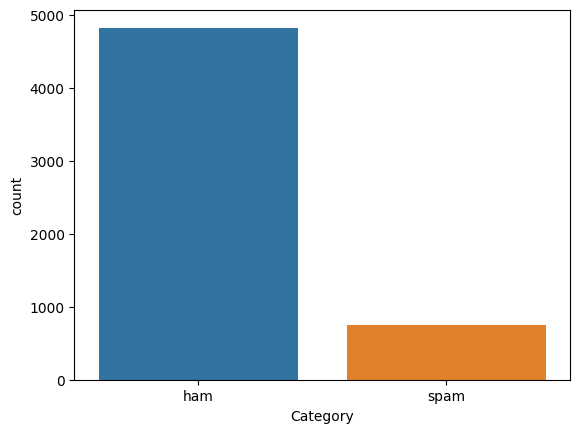

In [ ]:
sns.countplot(x='Category',data=df)
plt.show()

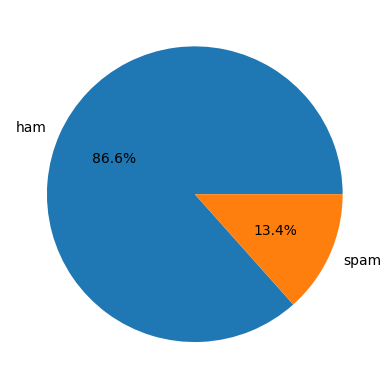

In [ ]:
plt.pie(df['Category'].value_counts(),labels=['ham','spam'],autopct='%1.1f%%')
plt.show()

In [ ]:
#Data Cleaning
df.isna().sum()

Category    0
Message     0
dtype: int64

In [ ]:
#label encoder for coverting category feature into labels
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
le.fit_transform(df['Category'])
df['Category']=le.transform(df['Category'])
df

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will ü b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [ ]:
#finding x and y variables
x=df.iloc[:,-1]
y=df.iloc[:,0]
print(x.shape,y.shape)

(5572,) (5572,)


In [ ]:
#splitting data into training and testing data
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=12)
print(xtrain.shape,xtest,ytrain.shape,ytest.shape)

(3900,) 3134                            So no messages. Had food?
5037    You won't believe it but it's true. It's Incre...
785     Dont think so. It turns off like randomlly wit...
730                                     Dunno y u ask me.
355         &lt;#&gt; ISH MINUTES WAS 5 MINUTES AGO. WTF.
                              ...                        
3034                          Aight, lemme know what's up
1668    So now my dad is gonna call after he gets out ...
603                Speaking of does he have any cash yet?
4233                             I'm at home. Please call
1797    Hey, can you tell me blake's address? Carlos w...
Name: Message, Length: 1672, dtype: object (3900,) (1672,)


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
v=CountVectorizer()
xtraincount=v.fit_transform(xtrain.values)
xtestcount=v.transform(xtest.values)


In [ ]:
#Model selection
from sklearn.naive_bayes import MultinomialNB
NBmodel=MultinomialNB()



In [ ]:
#Model Training
NBmodel.fit(xtraincount,ytrain)
#Model Testing
accuracy=NBmodel.score(xtestcount,ytest)
print("ACCuracy score=",accuracy*100)


ACCuracy score= 97.78708133971293


In [ ]:
ypred=NBmodel.predict(xtestcount)
ypred

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(ypred,ytest)
cm

array([[1432,   26],
       [  11,  203]])

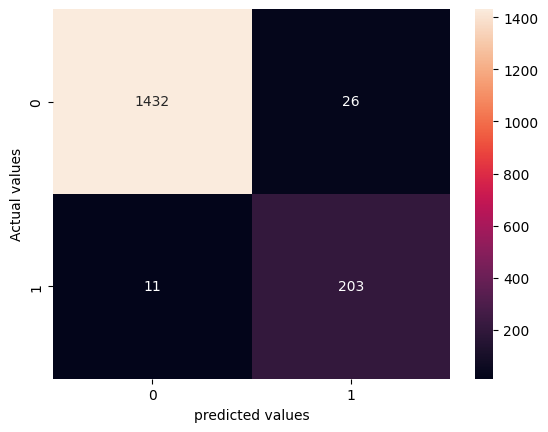

In [ ]:
sns.heatmap(cm,annot=True,fmt="d")
plt.xlabel('predicted values')
plt.ylabel('Actual values')
plt.show()